# Store Sales Prediction

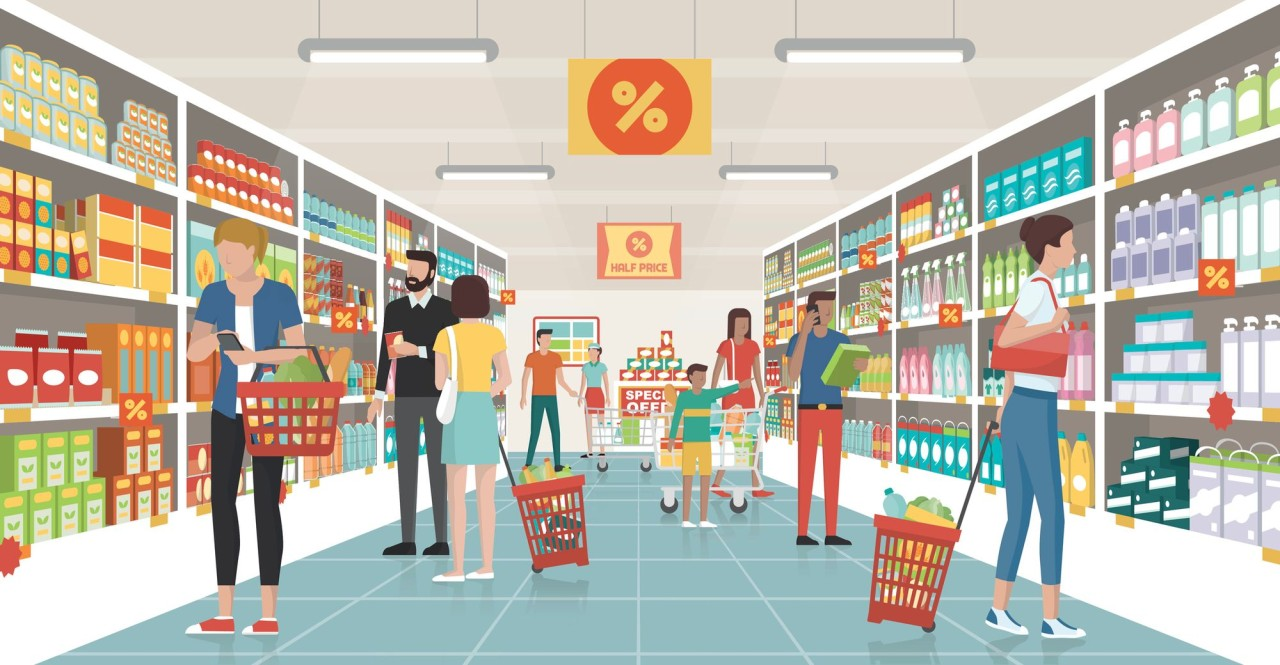
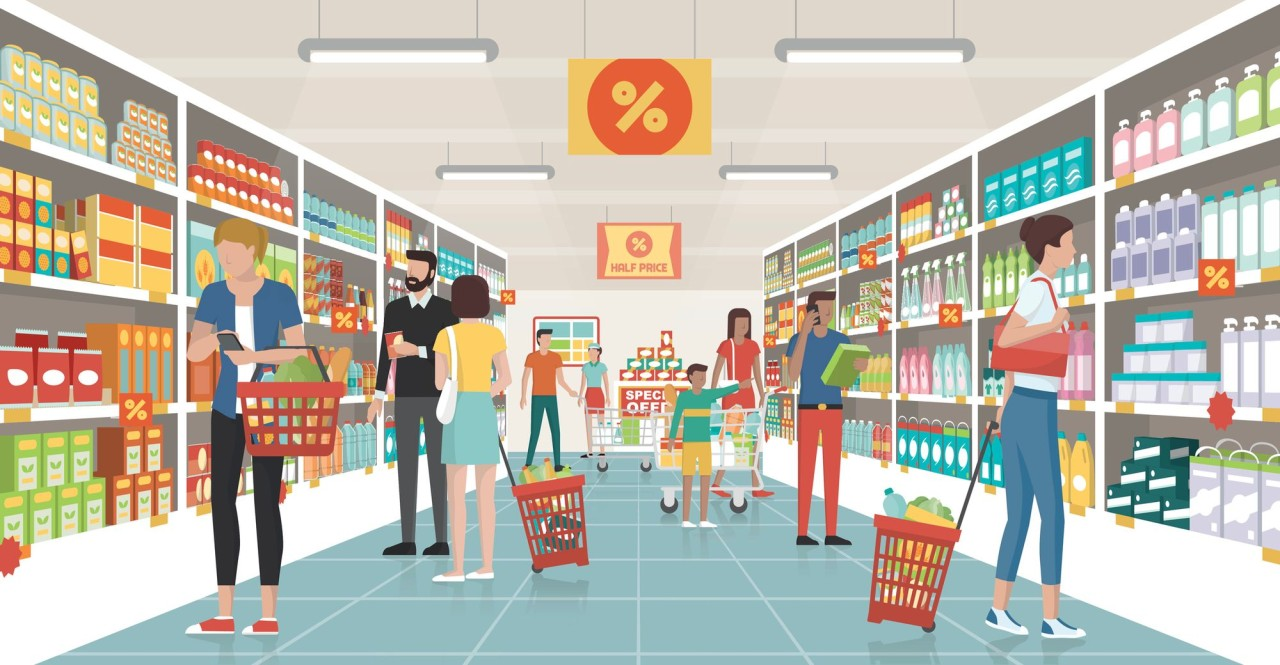

In this kernel, we will use time-series forecasting to forecast store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer. Specifically, we will build a model that more accurately predicts the unit sales for each store location and each product category. This dataset is used in [this keggle competition](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview). 

*** All codes are commented out to save memory.

## Loading Libraries

In [1]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from xgboost import XGBRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_log_error
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# def rmsle(y_true, y_pred):
#     return np.sqrt(mean_squared_log_error(y_true, y_pred))

# pd.set_option('display.max_rows', 365)
# pd.set_option('display.max_columns', None)

## Defining Functions

In [2]:
# def plot_by_family(df, family_list=None, vline_dates=None, figsize=(30,4)):
#     for family in family_list:
#         mask = (df['family'] == family)
#         current_fam_summary = df.loc[mask].groupby('date', observed=True)[['sales']].sum()
        
#         current_fam_summary.plot(figsize=figsize)
        
#         plt.title(f'Sales - {family}')
        
#         if vline_dates != None:
#             for date in vline_dates:
#                 plt.axvline(x=pd.to_datetime(date), color='gray', linestyle='--')
        
#         plt.tight_layout()
#         plt.show()
        
# def plot_by_store(df, store_list=None, vline_dates=None, figsize=(30,4)):
#     for store in store_list:
#         mask = (df['store_nbr'] == store)
#         current_store_summary = df.loc[mask].groupby('date', observed=True)[['sales']].sum()
        
#         current_store_summary.plot(figsize=figsize)
        
#         plt.title(f'Sales - Store {store}')
        
#         if vline_dates != None:
#             for date in vline_dates:
#                 plt.axvline(x=pd.to_datetime(date), color='gray', linestyle='--')
        
#         plt.tight_layout()
#         plt.show()
        
# def add_open_on_jan1st(df):
#     mask = (df['store_nbr'] == '25') & (df['date'].dt.month==1) & (df['date'].dt.day==1)
#     new_df = df.assign(open_on_jan1st = np.where(mask, 1, 0))
    
#     return new_df

# def add_store_exist(df):
#     mask = (
#         ((df['store_nbr'] == '20') & (df['date'] < '2015-02-13')) | 
#         ((df['store_nbr'] == '21') & (df['date'] < '2015-07-24')) |
#         ((df['store_nbr'] == '22') & (df['date'] < '2015-10-09')) |
#         ((df['store_nbr'] == '29') & (df['date'] < '2015-03-20')) |
#         ((df['store_nbr'] == '42') & (df['date'] < '2015-08-21')) |
#         ((df['store_nbr'] == '52') & (df['date'] < '2017-04-20'))
#         #     ((df['store_nbr'] == '36') & (df['date'] < '2013-05-09')) |
#         #     ((df['store_nbr'] == '53') & (df['date'] < '2014-05-29'))
#     ) 
    
#     df['store_exist'] = np.where(mask, 0, 1).astype(np.int8)
    
#     return df

# def check_availability(row):
#     return 0 if no_available_dict.get(row['store_nbr']) == row['family'] else 1

# def add_availability(df):
#     df['availability'] = df.apply(check_availability, axis=1)
    
#     return df

# def window_plot_by_family(df, family_list=None, year=2017, month_until=12, pay_day=False, vline_dates=None, figsize=(30,4)):
#     for family in family_list:
#         mask = (df['family'] == family) & (df['date'].dt.year==year) & (df['date'].dt.month<=month_until)
#         current_fam_summary = df.loc[mask].groupby('date', observed=True)[['sales']].sum()
        
#         current_fam_summary.plot(figsize=figsize)
        
#         plt.title(f'Sales - {family} until {month_until}/{year}')

#         if pay_day == True:
#             current_fam_summary.index = current_fam_summary.index.to_timestamp()
#             for date in current_fam_summary.index:
#                 if date.day == 15 or date == date + pd.offsets.MonthEnd(0):
#                     plt.axvline(x=date, color='gray', linestyle='--')
                        
#         if vline_dates != None:
#             for date in vline_dates:
#                 plt.axvline(x=pd.to_datetime(date), color='gray', linestyle='--')
        
#         plt.tight_layout()
#         plt.show()
        
# def window_plot_by_store(df, store_list=None, year=2017, month_until=12, pay_day=False, vline_dates=None, figsize=(30,4)):
#     for store in store_list:
#         mask = (df['store_nbr'] == store) & (df['date'].dt.year==year) & (df['date'].dt.month<=month_until)
#         current_store_summary = df.loc[mask].groupby('date', observed=True)[['sales']].sum()
        
#         current_store_summary.plot(figsize=figsize)
        
#         plt.title(f'Sales - Store {store} until {month_until}/{year}')

#         if pay_day == True:
#             current_store_summary.index = current_store_summary.index.to_timestamp()
#             for date in current_store_summary.index:
#                 if date.day == 15 or date == date + pd.offsets.MonthEnd(0):
#                     plt.axvline(x=date, color='gray', linestyle='--')
                        
#         if vline_dates != None:
#             for date in vline_dates:
#                 plt.axvline(x=pd.to_datetime(date), color='gray', linestyle='--')
        
#         plt.tight_layout()
#         plt.show()
        
# def highlight_top3(s):
#     top3 = s.nlargest(3)
#     color_map = {
#         top3.index[0]: 'background-color: gold',  # 1st place
#         top3.index[1]: 'background-color: silver',  # 2nd place
#         top3.index[2]: 'background-color: #cd7f32'    # 3rd place
#     }
#     return [color_map.get(idx, '') for idx in s.index]

# def make_lags(ts, lags, prefix = None):
#     return pd.concat({
#             f'{prefix}_lag_{i}': ts.shift(i)
#             for i in lags
#         },
#         axis=1)

# def add_temp_closed(df):
    
#     mask = (
#         ((df['store_nbr'] == '12') & (df['date'] >= '2015-03-30') & (df['date'] <= '2015-05-28')) | # store 12
#         ((df['store_nbr'] == '18') & (df['date'] >= '2016-08-15') & (df['date'] <= '2016-12-02')) | # store 18
#         ((df['store_nbr'] == '25') & (df['date'] >= '2016-08-22') & (df['date'] <= '2016-10-26')) # store 25
#            )
    
#     df['temp_closed'] = np.where(mask, 1, 0)
    
#     return df

# def merge_and_clean(df, events_df):
#     df = df.merge(events_df, how='left', left_index=True, right_on='date')
#     df['description'] = df['description'].cat.add_categories(['None']).fillna('None').cat.remove_unused_categories()
#     df = df.rename(columns={'description': 'holidays_events'}).set_index('date')
    
#     return df

# def quality_assurance(df):
#     df = add_open_on_jan1st(df)
#     df = add_temp_closed(df)
#     df = add_availability(df)
#     df = add_store_exist(df)
    
#     mask = (
#         ((df['open_on_jan1st'] == 0) & (df['date'].dt.month == 1) & (df['date'].dt.day == 1)) | 
#         (df['temp_closed'] == 1) | 
#         (df['availability'] == 0) | 
#         (df['store_exist'] == 0)
#     )

#     df['pred'] = np.where(mask, 0, df['pred'])
    
#     df = df.drop(['open_on_jan1st', 'temp_closed', 'availability', 'store_exist'], axis=1)
    
#     return df

## Reading Data

In [3]:
# train = pd.read_csv('train.csv', 
#                     parse_dates=['date'],
#                     dtype={
#                         'store_nbr': 'category',
#                         'family': 'category',
#                         'sales': np.float32,
#                         'onpromotion': np.int16
#                     })

# test = pd.read_csv('test.csv', 
#                    parse_dates=['date'],
#                    dtype={
#                        'store_nbr': 'category',
#                        'family': 'category',
# #                        'sales': np.float32,
#                        'onpromotion': np.int16
#                    })

# holidays_events = pd.read_csv('holidays_events.csv',
#                        parse_dates=['date'],
#                        dtype={
#                            'type': 'category',
#                            'locale': 'category',
#                            'locale_name': 'category',
#                            'description': 'category',
#                            'transferred': 'bool'
#                        })

# oil = pd.read_csv('oil.csv',
#                   parse_dates=['date'],
#                   dtype={
#                       'dcoilwtico': np.float32
#                   })

# stores = pd.read_csv('stores.csv',
#                      dtype={
#                          'store_nbr': 'category',
#                          'city': 'category',
#                          'state': 'category',
#                          'type': 'category',
#                          'cluster': np.int8
#                      })

# transactions = pd.read_csv('transactions.csv',
#                            parse_dates=['date'],
#                            dtype={
#                                'store_nbr': 'category',
#                                'transactions': np.int16
#                            })

In [5]:
# train_orig = train.copy()
# test_orig = test.copy()
# holidays_events_orig = holidays_events.copy()
# oil_orig = oil.copy()
# stores_orig = stores.copy()
# transactions_orig = transactions.copy()

## Overview

In [6]:
# train_df = train_orig.drop('id', axis=1)
# test_df = test_orig.drop('id', axis=1)
# holidays_events_df = holidays_events.copy()
# oil_df = oil.copy()
# stores_df = stores.copy()
# transactions_df = transactions.copy()

In [7]:
# train_df.head()

In [8]:
# test_df.head()

In [9]:
# holidays_events_df.head()

In [10]:
# oil_df.head()

In [11]:
# stores_df.head()

In [12]:
# transactions_df.head()

### Set Period to 'D'

In [13]:
# train_df['date'] = train_df['date'].dt.to_period('D')
# test_df['date'] = test_df['date'].dt.to_period('D')
# holidays_events_df['date'] = holidays_events_df['date'].dt.to_period('D')
# oil_df['date'] = oil_df['date'].dt.to_period('D')
# transactions_df['date'] = transactions_df['date'].dt.to_period('D')

In [14]:
# train_last_date = train_df['date'].iloc[-1]
# test_start_date = train_last_date + 1

# print(f'train_last_date: {train_last_date}')
# print(f'test_first_date: {test_start_date}')

## EDA
### How does sales look like for each family?

In [15]:
# family_list = train_df['family'].cat.categories.to_list()

In [16]:
# plot_by_family(train_df, family_list)

### What does sales look like for each store?

In [17]:
# store_list = train_df['store_nbr'].cat.categories.to_list()

In [18]:
# plot_by_store(train_df, store_list)

Probably, we can remove year 2013-2014 and use the data from 2014 since 2013-2014 seem to contain noises that might prevent our model to perform well. 

In [19]:
# train_df_from2015 = train_df.loc[train_df['date'].dt.year >= 2015]

### Were stores opened on Christmas and New Year?

In [20]:
# mask = (transactions_df['date'].dt.month == 12) & (transactions_df['date'].dt.day ==25)

# transactions_df.loc[mask]

In [21]:
# mask = (transactions_df['date'].dt.month ==1) & (transactions_df['date'].dt.day ==1)

# transactions_df.loc[mask]

In [23]:
# mask = (train_df_from2015['date'].dt.month==1) & (train_df_from2015['date'].dt.day==1) & (train_df_from2015['sales']!=0)

# train_df_from2015[mask]

- There is no data on December 25th. All stores were most likely closed.
- Store number 25 was open on January 1st every year.

#### Adding 'open_on_jan1st' feature

In [24]:
# train_df_from2015 = add_open_on_jan1st(train_df_from2015)
# test_df = add_open_on_jan1st(test_df)

### Which stores had grand opening between 2015-01-01 and 2017-08-15?

In [25]:
# train_df_from2015

In [26]:
# train_df_t = pd.merge(train_df_from2015,
#                       transactions_df,
#                       how='left',
#                       left_on = ['date', 'store_nbr'],
#                       right_on = ['date', 'store_nbr']
#                      )

# train_df_t['transactions'] = train_df_t['transactions'].fillna(0)

In [27]:
# t_by_date_store = train_df_t.groupby(['date', 'store_nbr'], observed=True).agg({'transactions': 'mean', 'sales': 'sum'})

# STORE_NBR = '52'
# YEAR = 2017

# mask = (t_by_date_store.index.get_level_values('store_nbr') == STORE_NBR) & (t_by_date_store.index.get_level_values('date').year == YEAR)
# t_by_date_store[mask]

#### Adding 'store_exist' feature

In [28]:
# train_df_t = add_store_exist(train_df_t)
# test_df = add_store_exist(test_df)

### Does each store sell every family of products?

In [29]:
# train_df_v2 = train_df_t.drop('transactions', axis=1)

In [30]:
# sales_by_family_and_store = train_df_v2.set_index(['date', 'store_nbr', 'family']).unstack('store_nbr').loc[:,'sales']
# sales_by_family_and_store = sales_by_family_and_store.fillna(0)

# no_available_dict = {}

# for store in store_list:
    
#     store_sale_by_family = sales_by_family_and_store.loc[:, [store]].reset_index('family').groupby('family', observed=True)[[store]].sum().astype(int)
    
#     for family in family_list:
#         if store_sale_by_family.loc[family, store] == 0:
#             no_available_dict[store] = family

In [31]:
# no_available_dict

#### Adding 'availability' feature

In [32]:
# train_df_v2 = add_availability(train_df_v2)
# test_df = add_availability(test_df)

### Did promotion successfully lead to more sales?

In [33]:
# fig, axes = plt.subplots(len(family_list), 4, figsize=(25, len(family_list) * 4))

# for i, family in enumerate(family_list):
    
#     current_fam_summary = (train_df_v2.loc[train_df_v2['family'] == family]
#                            .groupby('date')
#                            .agg({'sales': 'sum', 'onpromotion': 'sum'})
#                           )
    
#     current_fam_summary['onpromotion_binary'] = (current_fam_summary['onpromotion'] > 0).astype(int)
    
#     plots = [
#         ('Scatterplot', sns.scatterplot, 'onpromotion', 'sales'),
#         ('Boxplot', sns.boxplot, 'onpromotion_binary', 'sales'),
#         ('Violinplot', sns.violinplot, 'onpromotion_binary', 'sales'),
#         ('Countplot', sns.countplot, 'onpromotion_binary', None)
#     ]
    
#     for j, (title, plot_func, x, y) in enumerate(plots):
#         plot_func(data=current_fam_summary, x=x, y=y, ax=axes[i, j])
#         axes[i, j].set_title(f'{title} - {family}')

# plt.tight_layout()
# plt.show()

### Does oil price have any correlation with store sales?

In [34]:
# oil_df_dt_idx = oil_df.set_index('date')

In [35]:
# plots_per_row = 2
# num_rows = (len(family_list) + plots_per_row - 1) // plots_per_row

# fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(25, len(family_list) * 4))

# axes = axes.flatten()

# for i, family in enumerate(family_list):
#     current_fam_summary = train_df_v2.loc[train_df_v2['family'] == family].groupby('date', observed=True)[['sales']].sum()
#     current_fam_summary_merged = pd.merge(current_fam_summary, oil_df_dt_idx, how='left', left_index=True, right_index=True)
#     current_fam_summary_merged['dcoilwtico'] = current_fam_summary_merged['dcoilwtico'].bfill()
# #     current_fam_summary_merged['oil_price_cluster'] = np.where(current_summary_merged['dcoilwtico'] < 70, 0,1)
    
#     sns.scatterplot(data=current_fam_summary_merged, x='dcoilwtico', y='sales',ax = axes[i])
#     axes[i].set_title(f'Scatterplot Oil Price vs {family} Sales')
    
# for j in range(len(family_list), len(axes)):
#     fig.delaxes(axes[j])


# plt.tight_layout()
# plt.show();

- Does not seem to have a clear relationship.

### Does biweekly pay on 15th and EOM have any correlation with store sales?

In [36]:
# window_plot_by_family(train_df_v2, family_list, year=2016, month_until=3, pay_day=True)

In [37]:
# window_plot_by_store(train_df_v2, store_list=store_list, year=2016, month_until=3, pay_day=True)

- Does not seem to have a clear relationship.

### Does store types and clusters have any correlation with store sales?

In [38]:
# stores_df.loc[:, ['type', 'cluster', 'state', 'city', 'store_nbr']].sort_values(['type', 'cluster', 'store_nbr'])

In [39]:
# train_df_v3 = pd.merge(train_df_v2, stores_df, how='left', on='store_nbr')
# test_df = pd.merge(test_df, stores_df, how='left', on='store_nbr')

In [40]:
# stores_df.groupby('type', observed=True)[['store_nbr']].count()

In [41]:
# pd.crosstab(index=train_df_v3['date'], columns=train_df_v3['type'], values=train_df_v3['sales'], aggfunc='mean').plot(figsize=(20,8))
# plt.title('MEAN Sales by Type');

In [42]:
# pd.crosstab(index=train_df_v3['date'], columns=train_df_v3['type'], values=train_df_v3['sales'], aggfunc='sum').plot(figsize=(20,8))
# plt.title('TOTAL Sales by Type');

In [43]:
# stores_df.groupby('cluster', observed=True)[['store_nbr']].count().rename(columns={'store_nbr': 'count'})

In [44]:
# (pd.crosstab(index=train_df_v3['date'], 
#              columns=train_df_v3['cluster'], 
#              values=train_df_v3['sales'], 
#              aggfunc='mean')
#  .boxplot(figsize=(20,8), grid=False))

# plt.title('MEAN Sales by Cluster');

In [45]:
# train_df_v3 = train_df_v3.drop(['state', 'city'], axis=1)
# test_df = test_df.drop(['state', 'city'], axis=1)

### Which store has the largest sales volume?

In [46]:
# train_df_v3.groupby(['store_nbr'], observed=True)['sales'].agg(['mean', 'sum']).sort_values('mean', ascending=False).head(10)

### Which family has the largest sales volume?

In [47]:
# train_df_v3.groupby(['family'], observed=True)['sales'].agg(['mean', 'sum']).sort_values('mean', ascending=False).head(10)

### Which family is the top selling category at each store?

In [48]:
# crosstab_df = pd.crosstab(index=train_df_v3['store_nbr'].astype(int), 
#                           columns=train_df_v3['family'], 
#                           values=train_df_v3['sales'], 
#                           aggfunc='mean')

# styled_crosstab = crosstab_df.style.apply(highlight_top3, axis=1)

# styled_crosstab

### Which store has the largest sales volume for each family?

In [49]:
# styled_crosstab = crosstab_df.style.apply(highlight_top3, axis=0)

# styled_crosstab

### Holidays & Events
> NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.

> Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

In [50]:
# first_date = train_df_v3.iloc[0, 0]
# last_date = test_df.iloc[-1, 0]

# holidays_events_df_window = holidays_events_df.query("date >= @first_date and date <= @last_date and transferred == False")
# holidays_events_df_window['description'] = holidays_events_df_window['description'].cat.remove_unused_categories()

In [51]:
# for col in ['type', 'locale', 'locale_name']:
#     print(holidays_events_df_window[col].value_counts())
#     print()
#     print();

In [53]:
# holidays_events_df_window['description'].value_counts().sort_values(ascending=False)

In [54]:
# holidays_events_list = [
#     'Batalla de Pichincha',
#     'Traslado Batalla de Pichincha',
#     'Carnaval', 
#     'Dia de Difuntos', # all soul's day
#     'Dia de la Madre', # mother's day
#     'Dia de la Madre-1', 
#     'Dia del Trabajo', # labor day
#     'Fundacion de Quito', 
#     'Fundacion de Quito-1',
#     'Fundacion de Guayaquil',
#     'Traslado Fundacion de Guayaquil'
#     'Fundacion de Guayaquil-1',
#     'Independencia de Cuenca',
#     'Independencia de Guayaquil', 
#     'Navidad-1', # christmas eve
#     'Navidad-2',
#     'Navidad-3',
#     'Navidad-4',
#     'Primer Grito de Independencia',
#     'Traslado Primer Grito de Independencia',
#     'Primer dia del ano', # new-year
#     'Traslado Primer dia del ano',
#     'Primer dia del ano-1', # new-year's eve
#     # Terremoto Manabi,
#     'Viernes Santo', 
# ]

In [55]:
# selected_events_df = (holidays_events_df_window[holidays_events_df_window['description'].isin(holidays_events_list)]
#              .drop(['type', 'locale', 'locale_name', 'transferred'], axis=1)
#              .sort_index()
#             )

In [56]:
# train_df_v4 = pd.merge(train_df_v3, selected_events_df, how='left', on='date')
# test_df = pd.merge(test_df, selected_events_df, how='left', on='date')

# train_df_v4['description'] = train_df_v4['description'].cat.add_categories(['None'])
# train_df_v4['description'] = train_df_v4['description'].fillna('None')

# test_df['description'] = test_df['description'].cat.add_categories(['None'])
# test_df['description'] = test_df['description'].fillna('None')

# train_df_v4['description'] = train_df_v4['description'].cat.remove_unused_categories()
# test_df['description'] = test_df['description'].cat.remove_unused_categories()

# train_df_v4 = train_df_v4.rename(columns={'description': 'holidays_events'})
# test_df = test_df.rename(columns={'description': 'holidays_events'})

### How much impact did earthquake in 2016 have on store sales?
> A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.


In [57]:
# holidays_events_df_window.loc[holidays_events_df_window['description'].str.contains('Terremoto Manabi'), 'date'].values

In [58]:
# earthquake_dates = ['2016-04-16', 
#                     '2016-04-23', # a week
#                     '2016-04-30', # two weeks
#                     '2016-05-07', # 3 weeks
#                     '2016-05-14'] # a month

# window_plot_by_family(train_df_v4, family_list=family_list, year=2016, vline_dates=earthquake_dates)

- Multiple categories, such as Grocery 1, Home Care, etc., had a sales spike after the earthquake.
- We already know that Grocery 1 is the largest sales volume category, so a spike in this category has a significant positive impact on store sales.

In [59]:
# window_plot_by_store(train_df_v4, store_list=store_list, year=2016, vline_dates=earthquake_dates)

- Most stores had a spike within a week after the earthquake.
- Store 2 had multiple spikes: the first one within a week after, the second one in week 2 and the biggest one in week 3.

In [60]:
# vulcano_idx = train_df_v4['date'].unique()

In [61]:
# vulcano_idx = train_df_v4['date'].unique()
# vulcano = pd.DataFrame((vulcano_idx == '2016-04-16')*1.0, index = vulcano_idx, columns = ['vulcano'])
# X_vulcano = make_lags (vulcano.squeeze(), lags = range(22), prefix = 'vulcano')
# X_vulcano = X_vulcano.fillna(0.0)

In [62]:
# train_df_v5 = pd.merge(train_df_v4, X_vulcano, how='left', left_on='date', right_index=True)

# test_df = pd.merge(test_df, X_vulcano, how='left', left_on='date', right_index=True)

In [63]:
# test_df.loc[:, test_df.columns.str.contains('vulcano')] = test_df.loc[:, test_df.columns.str.contains('vulcano')].fillna(0.0)

### Were there any temporary closure?

In [64]:
# plot_by_store(train_df_v5, store_list)

- store 12
- store 18
- store 25

#### Adding 'temp_closed' feature

In [65]:
# train_df_final = add_temp_closed(train_df_v5)
# test_df = add_temp_closed(test_df)

## Preprocessing

In [66]:
# y_train = train_df_final.set_index(['date', 'store_nbr', 'family']).unstack(['store_nbr', 'family'])['sales']

In [67]:
# fourier = CalendarFourier(freq="w", order=2)   

# dp = DeterministicProcess(index=y_train.index, 
#                           order=2,
#                           seasonal=True,
#                           additional_terms=[fourier]
#                          )

# X_1 = dp.in_sample()
# X_test_1 = dp.out_of_sample(16)

In [68]:
# X_1['day_of_week'] = X_1.index.dayofweek
# X_test_1['day_of_week'] = X_test_1.index.dayofweek

# X_1['month'] = X_1.index.month
# X_test_1['month'] = X_test_1.index.month

In [69]:
# X_1_merged = merge_and_clean(X_1, selected_events_df)
# X_test_1_merged = merge_and_clean(X_test_1, selected_events_df)

In [70]:
# ohe = OneHotEncoder(sparse_output=False, dtype=np.int8, handle_unknown='ignore', drop='first')

In [71]:
# ohe_transformed = ohe.fit_transform(X_1_merged[['day_of_week', 'month', 'holidays_events']])
# ohe_transformed_test = ohe.transform(X_test_1_merged[['day_of_week', 'month', 'holidays_events']])

# feature_names = ohe.get_feature_names_out(['day_of_week', 'month', 'holidays_events'])

# ohe_df = pd.DataFrame(ohe_transformed, index = X_1_merged.index, columns=feature_names)
# ohe_df_test = pd.DataFrame(ohe_transformed_test, index = X_test_1_merged.index, columns=feature_names)


# X_1_combined = pd.concat([X_1_merged, ohe_df], axis=1)
# X_1_combined = X_1_combined.drop(['day_of_week', 'month', 'holidays_events'], axis=1)

# X_test_1_combined = pd.concat([X_test_1_merged, ohe_df_test], axis=1)
# X_test_1_combined = X_test_1_combined.drop(['day_of_week', 'month', 'holidays_events'], axis=1)

In [72]:
# X_1_final = pd.merge(X_1_combined, X_vulcano, how='left', left_index=True, right_index=True)
# X_test_1_final = pd.merge(X_test_1_combined, X_vulcano, how='left', left_index=True, right_index=True)
# X_test_1_final = X_test_1_final.fillna(0.0)

In [73]:
# X_2 = train_df_final.set_index('date')
# X_test_2 = test_df.set_index('date')

# X_2['store_nbr'] = X_2['store_nbr'].astype(np.int16)
# X_test_2['store_nbr'] = X_test_2['store_nbr'].astype(np.int16)

In [74]:
# le = LabelEncoder() 

# X_2['family'] = le.fit_transform(X_2['family'])
# X_test_2['family'] = le.transform(X_test_2['family'])

In [75]:
# ohe_v2 = OneHotEncoder(sparse_output=False, dtype=np.int8, handle_unknown='ignore', drop='first')

# ohe_transformed = ohe_v2.fit_transform(X_2[['holidays_events', 'type']])
# ohe_transformed_test = ohe_v2.transform(X_test_2[['holidays_events', 'type']])

# feature_names = ohe_v2.get_feature_names_out(['holidays_events', 'type'])

# ohe_df = pd.DataFrame(ohe_transformed, index=X_2.index, columns=feature_names)
# ohe_df_test = pd.DataFrame(ohe_transformed_test, index=X_test_2.index, columns=feature_names)

# X_2_combined = pd.concat([X_2, ohe_df], axis=1)
# X_2_final = X_2_combined.drop(['holidays_events', 'type', 'sales'], axis=1)

# X_test_2_combined = pd.concat([X_test_2, ohe_df_test], axis=1)
# X_test_2_final = X_test_2_combined.drop(['holidays_events', 'type'], axis=1)

## Modeling

In [76]:
# class BoostedHybrid:
#     def __init__(self, model_1, model_2):
#         self.model_1 = model_1
#         self.model_2 = model_2
#         self.y_columns = None
        
#     def fit(self, X_1, X_2, y):
#         # fit self.model_1
#         self.model_1.fit(X_1, y)

#         y_fit = pd.DataFrame(
#             # make predictions with self.model_1
#             self.model_1.predict(X_1),
#             index = X_1.index, columns=y.columns,
#         )

#         # compute residuals
#         y_resid = y - y_fit
#         y_resid = y_resid.stack().stack().squeeze() # wide to long, stack twice for store_nbr and family

#         # fit self.model_2 on residuals
#         self.model_2.fit(X_2, y_resid)

#         # Save column names for predict method
#         self.y_columns = y.columns
#         # Save data for question checking
#         self.y_fit = y_fit
#         self.y_resid = y_resid
    
#     def predict(self, X_1, X_2):
#         # Predict with model_1
#         y_pred = pd.DataFrame(
#             self.model_1.predict(X_1), 
#             index=X_1.index, columns=self.y_columns,
#         )
#         y_pred = y_pred.stack().stack().squeeze()  # wide to long

#         # Add model_2 predictions to model_1 predictions
#         y_pred += self.model_2.predict(X_2)

#         return y_pred.clip(0.0)#.unstack()

In [77]:
# ''' 
# It's similar to the boosted model above, with one key difference: 
# We include model_1's prediction as a feature in X_2_train instead of subtracting it from y_train.
# '''
# class StackedHybrid:
#     def __init__(self, model_1, model_2):
#         self.model_1 = model_1
#         self.model_2 = model_2
#         self.y_columns = None  # store column names from fit method
        
#     def fit(self, X_1, X_2, y):
#         self.model_1.fit(X_1, y)
        
#         y_pred_1 = pd.DataFrame(                          
#             self.model_1.predict(X_1),
#             index=X_1.index, 
#             columns=y.columns
#         )
    
#         y_pred_1_long = y_pred_1.stack().stack().to_frame().reset_index(['family', 'store_nbr']).rename(columns={0: 'pred_1'})             
        
#         y_pred_1_long['family'] = le.transform(y_pred_1_long['family'])
#         y_pred_1_long['store_nbr'] = y_pred_1_long['store_nbr'].astype(np.int16)
        
#         X_2_stacked = pd.merge(X_2, y_pred_1_long, how='left', on=['date', 'family', 'store_nbr'])
            
#         self.model_2.fit(X_2_stacked, y)
        
#         # Save column names for the predict method
#         self.y_columns = y.columns
        
        
#     def predict(self, X_1, X_2):
        
#         y_pred_1 = pd.DataFrame(
#             self.model_1.predict(X_1),
#             index=X_1.index, 
#             columns=self.y_columns
#         )
        
#         y_pred_1_long = y_pred_1.stack().stack().to_frame().reset_index(['family', 'store_nbr']).rename(columns={0: 'pred_1'})             
        
#         y_pred_1_long['family'] = le.transform(y_pred_1_long['family'])
#         y_pred_1_long['store_nbr'] = y_pred_1_long['store_nbr'].astype(np.int16)
        
#         X_2_stacked = pd.merge(X_2, y_pred_1_long, how='left', on=['date', 'family', 'store_nbr'])

#         y_pred_2 = self.model_2.predict(X_2_stacked)
        
#         return y_pred_2.clip(0.0)

### Best Model: BosstedHybrid (Random Forest & XGBRegressor)

In [78]:
# model_1 = RandomForestRegressor(
#     n_estimators=500,
#     max_depth=20,
#     max_features='sqrt',
#     random_state=42,
#     max_samples=0.9
# )

# model_2 = XGBRegressor(
#     n_estimators=300,
#     max_depth=6,
#     learning_rate=0.1,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     reg_alpha=1,  
#     reg_lambda=100, 
#     random_state=42
# )

# hybrid = BoostedHybrid(model_1, model_2)

# hybrid.fit(X_1_final, X_2_final, y_train)

# y_pred = hybrid.predict(X_1_final, X_2_final)
# y_pred_df = pd.DataFrame(y_pred).reset_index().rename(columns={0: 'pred'})

In [79]:
# y_pred_df = quality_assurance(y_pred_df)

# rmsle(y_train.stack().stack().squeeze(), y_pred_df.set_index(['date', 'family', 'store_nbr']).squeeze())

In [80]:
# for family in family_list:
#     mask = (train_df_final['family'] == family)
#     mask_pred = (y_pred_df['family'] == family)
    
#     current_fam_summary = train_df_final.loc[mask].groupby('date', observed=True)[['sales']].sum()
#     pred_summary = y_pred_df.loc[mask_pred].groupby('date', observed=True)[['pred']].sum()
    
#     ax = current_fam_summary.plot(figsize=(30,4))
#     pred_summary.plot(ax=ax, figsize=(30,4))
#     plt.title(f'Sales - {family}')
    
#     plt.tight_layout()
#     plt.show()

In [81]:
# for store in store_list:
#     mask = (train_df_final['store_nbr'] == store)
#     mask_pred = (y_pred_df['store_nbr'] == store)
    
#     current_store_summary = train_df_final.loc[mask].groupby('date', observed=True)[['sales']].sum()
#     pred_summary = y_pred_df.loc[mask_pred].groupby('date', observed=True)[['pred']].sum()
    
#     ax = current_store_summary.plot(figsize=(30,4))
#     pred_summary.plot(ax=ax, figsize=(30,4))
#     plt.title(f'Sales - Store {store}')
    
#     plt.tight_layout()
#     plt.show()

## Submission

In [82]:
# y_test_pred = hybrid.predict(X_test_1_final, X_test_2_final)
# y_test_pred_df = pd.DataFrame(y_test_pred).reset_index().rename(columns={0: 'pred'})

# y_test_pred_df = quality_assurance(y_test_pred_df)

# y_test_pred_df['date'] = y_test_pred_df['date'].dt.to_timestamp()
# submission = pd.merge(test_orig, y_test_pred_df, how='left', on=['date', 'store_nbr', 'family'])

# submission['pred'] = np.where(submission.apply(check_availability, axis=1) == 0, 0, submission['pred'])

# submission = submission.rename(columns={'pred': 'sales'}).loc[:, ['id', 'sales']]
# submission

In [83]:
# submission.to_csv('test_submission_hybrid_rf_xgb_reg_v4.csv', index = False) 
# ## lb: 0.46102